# fill_between

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

The alpha channel is not necessary here, but it can be used to soften
colors for more visually appealing plots.  In other examples, as we'll
see below, the alpha channel is functionally useful as the shaded
regions can overlap and alpha allows you to see both.  Note that the
postscript format does not support alpha (this is a postscript
limitation, not a matplotlib limitation), so when using alpha save
your figures in PNG, PDF or SVG.

Our next example computes two populations of random walkers with a
different mean and standard deviation of the normal distributions from
which the steps are drawn.  We use filled regions to plot +/- one
standard deviation of the mean position of the population.  Here the
alpha channel is useful, not just aesthetic.



여기서 알파 채널은 필요하지 않지만 시각적으로 더 매력적인 플롯을 위해 색상을 부드럽게 하는 데 사용할 수 있습니다. 다른 예에서 아래에서 볼 수 있듯이 알파 채널은 음영 처리된 영역이 겹칠 수 있고 알파를 통해 두 영역을 모두 볼 수 있으므로 기능적으로 유용합니다. 포스트스크립트 형식은 알파를 지원하지 않으므로(이것은 matplotlib 제한이 아니라 포스트스크립트 제한임) 알파를 사용할 때 그림을 PNG, PDF 또는 SVG로 저장합니다.

다음 예에서는 계단이 그려지는 정규 분포의 평균과 표준 편차가 다른 두 개의 랜덤 워커 모집단을 계산합니다. 채워진 영역을 사용하여 모집단의 평균 위치에 대한 +/- 1 표준 편차를 표시합니다. 여기서 알파 채널은 미적인 것뿐만 아니라 유용합니다.

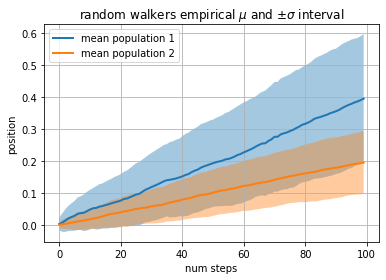

In [6]:
# Fixing random state for reproducibility
np.random.seed(19680801)

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)

mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)

ax.plot(t, mu1, lw=2, label='mean population 1')
ax.plot(t, mu2, lw=2, label='mean population 2')

ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C0', alpha=0.4) #  기준 축, 위 값, 아래 값
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.4) #  기준 축, 위 값, 아래 값

ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')

ax.set_xlabel('num steps')
ax.set_ylabel('position')

ax.grid()

The ``where`` keyword argument is very handy for highlighting certain
regions of the graph.  ``where`` takes a boolean mask the same length
as the x, ymin and ymax arguments, and only fills in the region where
the boolean mask is True.  In the example below, we simulate a single
random walker and compute the analytic mean and standard deviation of
the population positions.  The population mean is shown as the dashed
line, and the plus/minus one sigma deviation from the mean is shown
as the filled region.  We use the where mask ``X > upper_bound`` to
find the region where the walker is outside the one sigma boundary,
and shade that region red.



키워드 where인수는 그래프의 특정 영역을 강조 표시하는 데 매우 편리합니다. wherex, ymin 및 ymax 인수와 동일한 길이의 부울 마스크를 사용하고 부울 마스크가 True인 영역만 채웁니다. 아래 예에서는 단일 랜덤 워커를 시뮬레이션하고 모집단 위치의 분석 평균과 표준 편차를 계산합니다. 모집단 평균은 점선으로 표시되고, 평균에서 ±1 시그마 편차는 채워진 영역으로 표시됩니다. where 마스크를 사용하여 워커가 1 시그마 경계 외부에 있는 영역을 찾고 해당 영역을 빨간색으로 음영 처리합니다.X > upper_bound

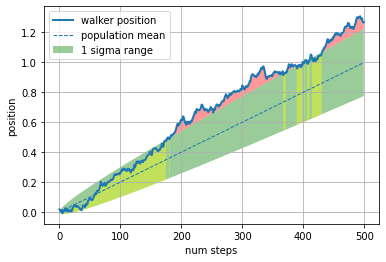

In [13]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)

ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')

ax.fill_between(t, lower_bound, upper_bound, facecolor='green', alpha=0.4,
                label='1 sigma range')

ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary 
ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4) # 기준축, #두 그래프 upper_bound, X 사이, 조건 where=X > upper_bound
ax.fill_between(t, lower_bound, X, where=X < upper_bound, fc='yellow', alpha=0.4)

ax.set_xlabel('num steps')
ax.set_ylabel('position')

ax.grid()

Another handy use of filled regions is to highlight horizontal or vertical
spans of an Axes -- for that Matplotlib has the helper functions
`~matplotlib.axes.Axes.axhspan` and `~matplotlib.axes.Axes.axvspan`.  See
:doc:`/gallery/subplots_axes_and_figures/axhspan_demo`.



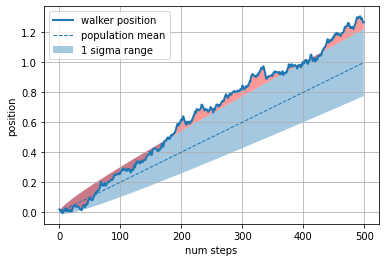

In [17]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)

ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')

ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4,
                label='1 sigma range')

ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, fc='red', alpha=0.4)

ax.set_xlabel('num steps')
ax.set_ylabel('position')

ax.grid()

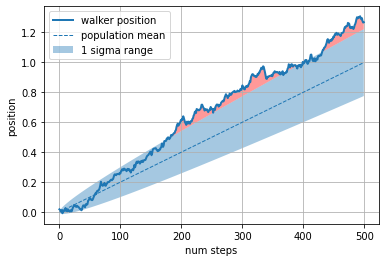

In [20]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)

ax.plot(t, X, lw=2, label='walker position')
ax.plot(t, mu*t, lw=1, label='population mean', color='C0', ls='--')

ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4,
                label='1 sigma range')

ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)


ax.set_xlabel('num steps')
ax.set_ylabel('position')

ax.grid()